Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/My Drive/Humana

/content/drive/.shortcut-targets-by-id/1kg9qiVsAGKqYoNfjJE72CYYL7_lsxWDQ/Humana


In [ ]:
ls

 Analysis/            'Data - Zipped'/  'Public Datasets'/
'Business Solution'/   Extra/           'Reference Presentations'/
'Data - Unzipped'/     Notebooks/


In [ ]:
cd Data - Unzipped

/content/drive/.shortcut-targets-by-id/1kg9qiVsAGKqYoNfjJE72CYYL7_lsxWDQ/Humana/Data - Unzipped


In [ ]:
ls

 2020_Competition_Data_Documentation.xlsx
'2020_Competition_Holdout .csv'
'2020_Competition_Training (1).csv'
 catboost_info/
'Copy of Shap_Classifier_Summary.gsheet'
'Copy of Shap_Classifier_Summary - Summary.csv'
 Final_Submission.csv
'Humana Mays Case Competition Kickoff Dark 08312020.pdf'
 lgbm_importances-01.png
 Random_forest_classifier_shap.csv
 Readme.txt
 SHAP_0.csv
 SHAP_0.gsheet
 SHAP_1.csv
 SHAP_1.gsheet
 Shap_Classifier_Summary.gsheet
 SHAP.csv
 SHAP.gsheet
'VERSION 2 - 2020_Competition_Data_Documentation V2.xlsx'


Importing Libraries

In [ ]:
import pandas as pd
#from pandas_visual_analysis import VisualAnalysis
import seaborn as sns
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
%matplotlib inline
from pandas_profiling import ProfileReport
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


Data Exploration

In [ ]:
df = pd.read_csv('2020_Competition_Training (1).csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (80,193) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df_holdout = pd.read_csv('2020_Competition_Holdout .csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (79) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df_holdout.head()

,person_id_syn,src_platform_cd,sex_cd,est_age,smoker_current_ind,smoker_former_ind,lang_spoken_cd,mabh_seg,cci_score,dcsi_score,fci_score,hcc_weighted_sum,betos_d1c_pmpm_ct,betos_d1d_pmpm_ct,betos_m1b_pmpm_ct,betos_m2c_pmpm_ct,betos_m5b_pmpm_ct,betos_m5c_pmpm_ct,betos_m5d_pmpm_ct,betos_o1a_pmpm_ct,betos_o1b_pmpm_ct,betos_o1e_pmpm_ct,betos_o1g_pmpm_ct,betos_t1a_pmpm_ct,betos_t1b_pmpm_ct,betos_t1e_pmpm_ct,betos_t1h_pmpm_ct,betos_t2a_pmpm_ct,betos_y2_pmpm_ct,bh_adtp_ind,bh_aoth_ind,bh_bipr_ind,bh_cdal_ind,bh_cdsb_ind,bh_cdto_ind,bh_dema_ind,ccsp_014_ind,ccsp_020_ind,ccsp_021_ind,ccsp_034_ind,ccsp_060_ind,ccsp_062_ind,ccsp_080_ind,ccsp_107_ind,ccsp_120_ind,ccsp_125_ind,ccsp_130_ind,ccsp_163_ind,ccsp_169_ind,ccsp_204_ind,ccsp_205_ind,ccsp_212_ind,ccsp_220_ind,ccsp_228_ind,ccsp_236_ind,ccsp_239_ind,ccsp_242_ind,cms_disabled_ind,cms_dual_eligible_ind,cms_hospice_ind,cms_low_income_ind,cms_ma_risk_score_nbr,cms_partd_ra_factor_amt,cms_ra_factor_type_cd,cms_risk_adj_payment_rate_a_amt,cms_risk_adj_payment_rate_b_amt,cms_risk_adjustment_factor_a_amt,cms_rx_risk_score_nbr,cms_tot_ma_payment_amt,cms_tot_partd_payment_amt,cmsd2_can_unc_neo/plycyth/myelo_ind,cmsd2_eye_blindness_ind,cmsd2_gus_m_genital_ind,cmsd2_men_mad_ind,cmsd2_men_men_substance_ind,cmsd2_mus_polyarthropath_ind,cmsd2_mus_spondylopath_ind,cmsd2_skn_radiation_ind,cmsd2_sns_general_ind,cons_cmys,cons_hcaccprf_h,cons_hcaccprf_p,cons_hhcomp,cons_homstat,cons_n2029_y,cons_n2mob,cons_n2pbl,cons_n2pmv,cons_n65p_y,cons_online_buyer,cons_ret_y,cons_retail_buyer,cons_veteran_y,credit_bal_1stmtg_30to59dpd,credit_bal_1stmtg_60to89dpd,credit_bal_1stmtg_collections,credit_bal_1stmtg_severederog,credit_bal_1stmtgcredit_60dpd,credit_bal_agency1stmorg_collectio,credit_bal_agencyfirstmtg_60dpd,credit_bal_agencyfirstmtg_new,credit_bal_autobank,credit_bal_autobank_new,credit_bal_autofinance,credit_bal_autofinance_new,credit_bal_bankcard_severederog,credit_bal_consumerfinance,credit_bal_consumerfinance_new,credit_bal_heloc_60dpd,credit_bal_heloc_severederog,credit_bal_mtg_90to119dpd,credit_bal_mtg_bankruptcy,credit_bal_mtg_severederog,credit_bal_mtgcredit_new,credit_bal_nonagn1stmorg_30to59dpd,credit_bal_nonagn1stmorg_60to89dpd,credit_bal_nonagn1stmorg_90to119dp,credit_bal_nonagn1stmorg_bankruptc,credit_bal_nonagn1stmorg_collectio,credit_bal_nonagnfirstmtg_60dpd,credit_bal_nonmtgcredit_60dpd,credit_bal_studentloan_60dpd,credit_bal_totalallcredit_60dpd,credit_bal_totalallcredit_60to89dpd,credit_bal_totalallcredit_90to119dpd,credit_bal_totalallcredit_new,credit_hh_1stmtg_severederog,credit_hh_1stmtgcredit,credit_hh_1stmtgcredit_new,credit_hh_agencyfirstmtg,credit_hh_agencyfirstmtg_new,credit_hh_autobank,credit_hh_autobank_new,credit_hh_autofinance,credit_hh_autofinance_new,credit_hh_bankcard_severederog,credit_hh_bankcardcredit_60dpd,credit_hh_consumerfinance,credit_hh_consumerfinance_new,credit_hh_mtg_severederog,credit_hh_mtgcredit_new,credit_hh_nonagnfirstmtg,credit_hh_nonmtgcredit_60dpd,credit_hh_studentloan,credit_hh_studentloan_60dpd,credit_hh_totalallcredit_bankruptcy,credit_hh_totalallcredit_collections,credit_hh_totalallcredit_severederog,credit_highcrd_consumerfinance_new,credit_minmob_1stmtgcredit,credit_minmob_agencyfirstmtg,credit_minmob_mtgcredit,credit_minmob_nonagn,credit_num_1stmtg_30to59dpd,credit_num_1stmtg_60to89dpd,credit_num_1stmtg_bankruptcy,credit_num_1stmtg_collections,credit_num_1stmtg_severederog,credit_num_1stmtgcredit,credit_num_1stmtgcredit_new,credit_num_agency1stmorg_collectio,credit_num_agencyfirstmtg,credit_num_agencyfirstmtg_60dpd,credit_num_agencyfirstmtg_new,credit_num_autobank,credit_num_autobank_new,credit_num_autofinance,credit_num_autofinance_new,credit_num_bankcard_severederog,credit_num_consumerfinance,credit_num_consumerfinance_new,credit_num_heloc_60dpd,credit_num_heloc_severederog,credit_num_mtg_60to89dpd,credit_num_mtg_90to119dpd,credit_num_mtg_collections,credit_num_mtg_severederog,credit_num_mtgcredit_new,credit_num_nonagn1stmorg_30to59dpd,credit_n

In [ ]:
df.shape

(69572, 826)

In [ ]:
df_holdout.head()

,person_id_syn,src_platform_cd,sex_cd,est_age,smoker_current_ind,smoker_former_ind,lang_spoken_cd,mabh_seg,cci_score,dcsi_score,fci_score,hcc_weighted_sum,betos_d1c_pmpm_ct,betos_d1d_pmpm_ct,betos_m1b_pmpm_ct,betos_m2c_pmpm_ct,betos_m5b_pmpm_ct,betos_m5c_pmpm_ct,betos_m5d_pmpm_ct,betos_o1a_pmpm_ct,betos_o1b_pmpm_ct,betos_o1e_pmpm_ct,betos_o1g_pmpm_ct,betos_t1a_pmpm_ct,betos_t1b_pmpm_ct,betos_t1e_pmpm_ct,betos_t1h_pmpm_ct,betos_t2a_pmpm_ct,betos_y2_pmpm_ct,bh_adtp_ind,bh_aoth_ind,bh_bipr_ind,bh_cdal_ind,bh_cdsb_ind,bh_cdto_ind,bh_dema_ind,ccsp_014_ind,ccsp_020_ind,ccsp_021_ind,ccsp_034_ind,ccsp_060_ind,ccsp_062_ind,ccsp_080_ind,ccsp_107_ind,ccsp_120_ind,ccsp_125_ind,ccsp_130_ind,ccsp_163_ind,ccsp_169_ind,ccsp_204_ind,ccsp_205_ind,ccsp_212_ind,ccsp_220_ind,ccsp_228_ind,ccsp_236_ind,ccsp_239_ind,ccsp_242_ind,cms_disabled_ind,cms_dual_eligible_ind,cms_hospice_ind,cms_low_income_ind,cms_ma_risk_score_nbr,cms_partd_ra_factor_amt,cms_ra_factor_type_cd,cms_risk_adj_payment_rate_a_amt,cms_risk_adj_payment_rate_b_amt,cms_risk_adjustment_factor_a_amt,cms_rx_risk_score_nbr,cms_tot_ma_payment_amt,cms_tot_partd_payment_amt,cmsd2_can_unc_neo/plycyth/myelo_ind,cmsd2_eye_blindness_ind,cmsd2_gus_m_genital_ind,cmsd2_men_mad_ind,cmsd2_men_men_substance_ind,cmsd2_mus_polyarthropath_ind,cmsd2_mus_spondylopath_ind,cmsd2_skn_radiation_ind,cmsd2_sns_general_ind,cons_cmys,cons_hcaccprf_h,cons_hcaccprf_p,cons_hhcomp,cons_homstat,cons_n2029_y,cons_n2mob,cons_n2pbl,cons_n2pmv,cons_n65p_y,cons_online_buyer,cons_ret_y,cons_retail_buyer,cons_veteran_y,credit_bal_1stmtg_30to59dpd,credit_bal_1stmtg_60to89dpd,credit_bal_1stmtg_collections,credit_bal_1stmtg_severederog,credit_bal_1stmtgcredit_60dpd,credit_bal_agency1stmorg_collectio,credit_bal_agencyfirstmtg_60dpd,credit_bal_agencyfirstmtg_new,credit_bal_autobank,credit_bal_autobank_new,credit_bal_autofinance,credit_bal_autofinance_new,credit_bal_bankcard_severederog,credit_bal_consumerfinance,credit_bal_consumerfinance_new,credit_bal_heloc_60dpd,credit_bal_heloc_severederog,credit_bal_mtg_90to119dpd,credit_bal_mtg_bankruptcy,credit_bal_mtg_severederog,credit_bal_mtgcredit_new,credit_bal_nonagn1stmorg_30to59dpd,credit_bal_nonagn1stmorg_60to89dpd,credit_bal_nonagn1stmorg_90to119dp,credit_bal_nonagn1stmorg_bankruptc,credit_bal_nonagn1stmorg_collectio,credit_bal_nonagnfirstmtg_60dpd,credit_bal_nonmtgcredit_60dpd,credit_bal_studentloan_60dpd,credit_bal_totalallcredit_60dpd,credit_bal_totalallcredit_60to89dpd,credit_bal_totalallcredit_90to119dpd,credit_bal_totalallcredit_new,credit_hh_1stmtg_severederog,credit_hh_1stmtgcredit,credit_hh_1stmtgcredit_new,credit_hh_agencyfirstmtg,credit_hh_agencyfirstmtg_new,credit_hh_autobank,credit_hh_autobank_new,credit_hh_autofinance,credit_hh_autofinance_new,credit_hh_bankcard_severederog,credit_hh_bankcardcredit_60dpd,credit_hh_consumerfinance,credit_hh_consumerfinance_new,credit_hh_mtg_severederog,credit_hh_mtgcredit_new,credit_hh_nonagnfirstmtg,credit_hh_nonmtgcredit_60dpd,credit_hh_studentloan,credit_hh_studentloan_60dpd,credit_hh_totalallcredit_bankruptcy,credit_hh_totalallcredit_collections,credit_hh_totalallcredit_severederog,credit_highcrd_consumerfinance_new,credit_minmob_1stmtgcredit,credit_minmob_agencyfirstmtg,credit_minmob_mtgcredit,credit_minmob_nonagn,credit_num_1stmtg_30to59dpd,credit_num_1stmtg_60to89dpd,credit_num_1stmtg_bankruptcy,credit_num_1stmtg_collections,credit_num_1stmtg_severederog,credit_num_1stmtgcredit,credit_num_1stmtgcredit_new,credit_num_agency1stmorg_collectio,credit_num_agencyfirstmtg,credit_num_agencyfirstmtg_60dpd,credit_num_agencyfirstmtg_new,credit_num_autobank,credit_num_autobank_new,credit_num_autofinance,credit_num_autofinance_new,credit_num_bankcard_severederog,credit_num_consumerfinance,credit_num_consumerfinance_new,credit_num_heloc_60dpd,credit_num_heloc_severederog,credit_num_mtg_60to89dpd,credit_num_mtg_90to119dpd,credit_num_mtg_collections,credit_num_mtg_severederog,credit_num_mtgcredit_new,credit_num_nonagn1stmorg_30to59dpd,credit_n

In [ ]:
df = pd.concat([df,df_holdout], axis = 0)

In [ ]:
df['transportation_issues'].isna().sum()

17681

Dropping Columns


In [ ]:

print(len(df.columns))
df = df.drop(['med_ip_ltach_admit_days_pmpm', 'med_ip_maternity_admit_days_pmpm', 'med_ip_mhsa_admit_days_pmpm', 'total_ip_ltach_admit_days_pmpm','total_ip_maternity_admit_days_pmpm','hlth_pgm_slvrsnkr_refer_status','hedis_ami'], axis =1)
print(len(df.columns))



826
819


In [ ]:
numerical_features = []
credit_features=[]
count_features=[]
float_numerical_features = []

for col in df.columns:
  if ('credit_' in col):
    credit_features.append(col)

for col in df.columns:
  if ('_ct' in col):
    count_features.append(col)

float_numerical_features = ['total_ip_rehab_admit_days_pmpm','cci_score','med_ip_rehab_admit_days_pmpm','total_ip_mhsa_admit_days_pmpm','cons_n2pmv','cons_n2mob','cons_n2pbl','hlth_pgm_slvrsnkr_pct_par','total_ip_snf_admit_days_pmpm','med_ip_snf_admit_days_pmpm','pdc_cvd','pdc_ost','pdc_dia','total_ip_acute_admit_days_pmpm','med_ip_acute_admit_days_pmpm','pdc_hf','pdc_ht','pdc_ast','pdc_lip','pdc_dep','cms_rx_risk_score_nbr','cms_partd_ra_factor_amt','cms_ma_risk_score_nbr','cms_risk_adjustment_factor_a_amt','cms_tot_partd_payment_amt','cms_risk_adj_payment_rate_a_amt','cms_risk_adj_payment_rate_b_amt','cms_tot_ma_payment_amt','credit_num_heloc_severederog']

numerical_features = credit_features + count_features + float_numerical_features

len(numerical_features)


431

In [ ]:
id_columns = 'person_id_syn'
target_feature = 'transportation_issues'

In [ ]:
cat_features = []


ind_features = [feature for feature in df.columns if '_ind' in feature]
float_cat_features = ['cons_hcaccprf_h','cons_hcaccprf_p','cons_n2029_y','cons_n65p_y','cons_online_buyer','cons_ret_y','cons_retail_buyer','cons_veteran_y']
int_cat_features = ['hlth_pgm_slvrsnkr_par_status','dcsi_score','fci_score','hcc_weighted_sum','est_age']
object_cat_features = ['sex_cd','lang_spoken_cd','hedis_cmc_ldc_c_control','hedis_cmc_ldc_c_screen','hedis_dia_eye','hedis_dia_hba1c_ge9','hedis_dia_hba1c_test','hedis_dia_ldc_c_control','hedis_dia_ldc_c_screen','hedis_dia_ma_nephr','cons_homstat','rucc_category','cms_ra_factor_type_cd','cons_cmys','cons_hhcomp','mabh_seg','state_cd','cnty_cd','zip_cd']

cat_features = ind_features + float_cat_features + int_cat_features + object_cat_features

len(ind_features)
#len(float_cat_features) + len(int_cat_features) + len(object_cat_features)

354

In [ ]:
df.columns

Index(['person_id_syn', 'transportation_issues', 'src_platform_cd', 'sex_cd',
       'est_age', 'smoker_current_ind', 'smoker_former_ind', 'lang_spoken_cd',
       'mabh_seg', 'cci_score',
       ...
       'submcc_rar_scl_ind', 'rx_gpi2_74_ind', 'rx_gpi2_89_ind',
       'rx_gpi2_96_ind', 'submcc_rsk_obe_ind', 'rx_gpi2_22_ind',
       'submcc_rsk_synx_ind', 'submcc_rsk_coag_ind', 'submcc_rsk_othr_ind',
       'submcc_rsk_chol_ind'],
      dtype='object', length=819)

Reference for binning est_age(age): https://healthcostinstitute.org/images/pdfs/Age-Curve-Study_0.pdf - Page 31

In [ ]:
df['age_bins_new'] = pd.cut(x=df['est_age'], bins=[20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85],labels=False )
df['age_bins_labeled'] = pd.cut(x=df['est_age'], bins=[20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85])

In [ ]:
df['age_bins_labeled'].value_counts()

(65, 70]    19979
(70, 75]    18759
(75, 80]    14530
(60, 65]     9573
(80, 85]     8190
(55, 60]     5192
(50, 55]     2426
(45, 50]     1390
(40, 45]      598
(35, 40]      480
(30, 35]      296
(25, 30]      191
(20, 25]      157
Name: age_bins_labeled, dtype: int64

In [ ]:
df['age_bins'].value_counts()

10.0    19979
11.0    18759
12.0    14530
9.0      9572
13.0     8190
0.0      5493
8.0      5192
7.0      2426
6.0      1390
5.0       598
4.0       480
3.0       296
2.0       191
1.0       157
Name: age_bins, dtype: int64

In [ ]:
df['age_bins_new'].value_counts()

9.0     19979
10.0    18759
11.0    14530
8.0      9573
12.0     8190
7.0      5192
6.0      2426
5.0      1390
4.0       598
3.0       480
2.0       296
1.0       191
0.0       157
Name: age_bins_new, dtype: int64

20 - 0.0, 25 - 1.0 and so  on

In [ ]:
df['age_bins_labeled'].isna().sum()

5492

In [ ]:
df['age_bins'] = 0

In [ ]:
df['age_bins_new'].fillna(-1, inplace=True)
for i in range(len(df['age_bins'])):
  df['age_bins'][0:i] = df['age_bins_new'][0:i] + int(1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df['age_bins'].unique()

array([ 9.,  8., 11.,  7., 13., 10., 12.,  0.,  6.,  5.,  4.,  3.,  1.,
        2.])

In [ ]:
df['transportation_issues'].value_counts()

0.0    59375
1.0    10197
Name: transportation_issues, dtype: int64

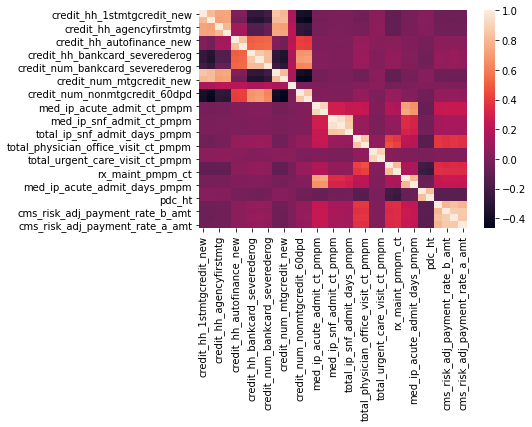

In [ ]:
%matplotlib inline
corr_list = ['credit_hh_1stmtgcredit_new', 'credit_hh_mtgcredit_new',  'credit_hh_agencyfirstmtg', 'credit_num_agencyfirstmtg',   'credit_hh_autofinance_new', 'credit_num_autofinance_new', 'credit_hh_bankcard_severederog', 'credit_hh_bankcardcredit_60dpd', 'credit_num_bankcard_severederog', 'credit_num_1stmtgcredit_new', 'credit_num_mtgcredit_new', 'credit_num_heloc_severederog', 'credit_num_nonmtgcredit_60dpd', 'credit_num_totalallcredit_severederog', 'med_ip_acute_admit_ct_pmpm', 'total_ip_acute_admit_ct_pmpm', 'med_ip_snf_admit_ct_pmpm', 'total_ip_snf_admit_ct_pmpm','total_ip_snf_admit_days_pmpm', 'med_physician_office_visit_ct_pmpm', 'total_physician_office_visit_ct_pmpm', 'med_urgent_care_visit_ct_pmpm', 'total_urgent_care_visit_ct_pmpm', 'rx_generic_pmpm_ct', 'rx_maint_pmpm_ct', 'total_ip_acute_admit_days_pmpm', 'med_ip_acute_admit_days_pmpm','pdc_hf', 'pdc_ht','cms_risk_adjustment_factor_a_amt','cms_risk_adj_payment_rate_b_amt', 'cms_tot_ma_payment_amt', 'cms_risk_adj_payment_rate_a_amt']


corr2 = df[df['transportation_issues'].notna()][corr_list].corr()
sns.heatmap(corr2)


In [ ]:
corr = df[df['transportation_issues'].notna()][numerical_features].corr()
#print(corr)
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if (corr.iloc[i,j] >= 0.8) or (corr.iloc[i,j] <= -0.8):
            print('{} is highly correlated with {} and the value is {}'.format(numerical_features[i],numerical_features[j],corr.iloc[i,j]))
            if columns[j]:
                columns[j] = False
num_selected_columns_num = df[numerical_features].columns[columns]
print(len(num_selected_columns_num))
print(len(numerical_features))


credit_hh_1stmtgcredit_new is highly correlated with credit_hh_mtgcredit_new and the value is 0.8171896487138623
credit_hh_1stmtgcredit_new is highly correlated with credit_num_1stmtgcredit_new and the value is 0.8537113152139024
credit_hh_1stmtgcredit_new is highly correlated with credit_num_mtgcredit_new and the value is 0.8048901738009833
credit_hh_agencyfirstmtg is highly correlated with credit_num_agencyfirstmtg and the value is 0.8045698056847904
credit_hh_agencyfirstmtg_new is highly correlated with credit_num_agencyfirstmtg_new and the value is 0.8588956193421874
credit_hh_autofinance_new is highly correlated with credit_num_autofinance_new and the value is 0.8361746787828207
credit_hh_bankcard_severederog is highly correlated with credit_hh_bankcardcredit_60dpd and the value is 0.8669042885584566
credit_hh_bankcard_severederog is highly correlated with credit_num_bankcard_severederog and the value is 0.8183001170175704
credit_hh_bankcardcredit_60dpd is highly correlated with c

In [ ]:

print(type(num_selected_columns_num))
selected_columns_num = num_selected_columns_num[1:].values

df_num = df[selected_columns_num]

a = []
for col in df_num.columns:
  if (col.startswith('cms_')) or (col.startswith('credit_')) or (col.startswith('cons_')):
    temp = sum(df_num[col] > df_num[col].mean())*100/len(df_num[col])
    if (temp > 70) or (temp < 30):
      a.append(col)

"""for col in df_num.columns:
  if (col.startswith('cms_')) or (col.startswith('credit_')) or (col.startswith('cons_')):
      #print(df_num[col].isna().sum())
      df_num[col].fillna((df_num[col].median()), inplace=True)
      #print(df_num[col].isna().sum())
"""

for col in df_num.columns:
  if (col.startswith('cms_')) or (col.startswith('credit_')) or (col.startswith('cons_')):
    if col in a:
      df_num[col].fillna((df_num[col].median()), inplace=True)
    else:
      df_num[col].fillna((df_num[col].mean()), inplace=True)

<class 'pandas.core.indexes.base.Index'>


/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4535: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:


df_cat = df[float_cat_features + int_cat_features + object_cat_features + ind_features]
len(df_cat.columns)


386

In [ ]:
len(df_cat.columns)

386

In [ ]:
len(set(df_num.columns))

410

In [ ]:
len(set(df_new.columns))

NameError: ignored

In [ ]:
ccsp_239_ind

In [ ]:
for col in df_cat.columns:
  if col == 'cms_ra_factor_type_cd':
    df_cat[col].fillna('X', inplace = True)
    df_cat[col] = df_cat[col].replace('*', 'X')
  elif (col == 'cons_hhcomp') or (col == 'cons_homstat'):
    df_cat[col].fillna('X', inplace = True)
  elif 'cons_' in col:
    df_cat[col].fillna(-1.0, inplace = True)
  

df_cat['cons_cmys'] = df_cat['cons_cmys'].replace('*', 0)
df_cat['cons_cmys'].value_counts()
df_cat['cons_cmys'] = df_cat['cons_cmys'].astype(int)


#df_cat = df_cat.drop(['hedis_cmc_ldc_c_control', 'hedis_cmc_ldc_c_screen'], axis = 1)
for col in df_cat.columns:
  if 'hedis_' in col:
    df_cat[col].fillna('X',inplace = True)
    #print(df_cat[col].value_counts())
    

df_cat.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4535: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

,cons_hcaccprf_h,cons_hcaccprf_p,cons_n2029_y,cons_n65p_y,cons_online_buyer,cons_ret_y,cons_retail_buyer,cons_veteran_y,hlth_pgm_slvrsnkr_par_status,dcsi_score,fci_score,hcc_weighted_sum,est_age,sex_cd,lang_spoken_cd,hedis_cmc_ldc_c_control,hedis_cmc_ldc_c_screen,hedis_dia_eye,hedis_dia_hba1c_ge9,hedis_dia_hba1c_test,hedis_dia_ldc_c_control,hedis_dia_ldc_c_screen,hedis_dia_ma_nephr,cons_homstat,rucc_category,cms_ra_factor_type_cd,cons_cmys,cons_hhcomp,mabh_seg,state_cd,cnty_cd,zip_cd,smoker_current_ind,smoker_former_ind,bh_adtp_ind,bh_aoth_ind,bh_bipr_ind,bh_cdal_ind,bh_cdsb_ind,bh_cdto_ind,bh_dema_ind,ccsp_014_ind,ccsp_020_ind,ccsp_021_ind,ccsp_034_ind,ccsp_060_ind,ccsp_062_ind,ccsp_080_ind,ccsp_107_ind,ccsp_120_ind,ccsp_125_ind,ccsp_130_ind,ccsp_163_ind,ccsp_169_ind,ccsp_204_ind,ccsp_205_ind,ccsp_212_ind,ccsp_220_ind,ccsp_228_ind,ccsp_236_ind,ccsp_239_ind,ccsp_242_ind,cms_disabled_ind,cms_dual_eligible_ind,cms_hospice_ind,cms_low_income_ind,cmsd2_can_unc_neo/plycyth/myelo_ind,cmsd2_eye_blindness_ind,cmsd2_gus_m_genital_ind,cmsd2_men_mad_ind,cmsd2_men_men_substance_ind,cmsd2_mus_polyarthropath_ind,cmsd2_mus_spondylopath_ind,cmsd2_skn_radiation_ind,cmsd2_sns_general_ind,lab_abn_result_ind,lab_bnp_abn_result_ind,lab_bun_abn_result_ind,lab_cholesterol_abn_result_ind,lab_creatinine_abn_result_ind,lab_egfr_abn_result_ind,lab_hba1_c_abn_result_ind,lab_hemoglobin_abn_result_ind,phy_em_pe_ind,phy_em_pi_ind,phy_em_px_ind,prov_fb_ind,prov_pcp_ind,prov_sp_ind,prov_spec_addiction_all_ind,prov_spec_ambulance_ind,prov_spec_bh_psychiatric_ind,prov_spec_chiropractic_ind,prov_spec_home_health_ind,prov_spec_med_supply_ind,prov_spec_nurse_phy_assist_ind,prov_spec_pain_mgmt_ind,prov_spec_phy_general_ind,prov_spec_phy_geriatric_ind,rev_cms_ambul_ind,rev_cms_clinic_ind,rev_cms_er_ind,rev_cms_icu_ind,rev_cms_lab_ind,rev_cms_nicu_ind,rev_cms_phar_ind,submcc_mus_back_ind,submcc_cad_ang_ind,rx_gpi2_31_ind,submcc_gus_othr_ind,submcc_trm_spfx_ind,submcc_bld_othr_ind,rx_gpi2_18_ind,rx_gpi2_32_ind,rx_gpi2_66_ind,submcc_hdz_it_is_ind,rx_gpi2_78_ind,rx_gpi2_45_ind,rx_gpi2_40_ind,submcc_ano_cns_ind,rx_gpi2_87_ind,submcc_trm_spnj_ind,rx_gpi2_84_ind,rx_gpi2_17_ind,betos_o1e_ind,submcc_pre_del_ind,submcc_can_gu_ind,rx_gpi2_16_ind,submcc_inf_sep_ind,submcc_can_ner_ind,submcc_res_copd_ind,submcc_ner_migr_ind,submcc_dig_othr_ind,submcc_can_sec_ind,rx_gpi2_53_ind,submcc_vco_end_ind,betos_t2a_ind,submcc_rar_drm_ind,rx_gpi2_81_ind,submcc_dia_eye_ind,rx_gpi2_62_ind,submcc_hdz_othr_ind,submcc_brn_othr_ind,rx_bh_ind,submcc_cir_art_ind,rx_gpi2_29_ind,submcc_trm_brn_ind,submcc_hiv_othr_ind,rx_gpi2_97_ind,rx_gpi2_42_ind,rx_gpi2_14_ind,betos_t1a_ind,submcc_ben_ner_ind,rx_gpi2_05_ind,betos_m2c_ind,rx_gpi2_54_ind,submcc_ben_lymp_ind,rx_gpi2_19_ind,submcc_ben_unk_ind,rx_gpi2_02_ind,submcc_cir_anur_ind,submcc_pre_othr_ind,rx_gpi2_12_ind,rx_gpi2_34_ind,submcc_ano_hrt_ind,submcc_cer_tia_ind,rx_gpi2_93_ind,submcc_hdz_arrh_ind,submcc_rar_ms_ind,rx_gpi2_47_ind,rx_gpi2_56_ind,betos_m5b_ind,submcc_dig_ugi_ind,rx_gpi2_33_ind,submcc_mus_soft_ind,submcc_res_othr_ind,submcc_ano_mus_ind,submcc_ner_deg_ind,rx_gpi2_51_ind,submcc_dia_pvd_ind,submcc_cir_othr_ind,submcc_can_leuk_ind,submcc_rar_othr_ind,rx_gpi2_35_ind,rx_gpi2_49_ind,submcc_ner_infl_ind,rx_gpi2_79_ind,rx_gpi2_27_ind,submcc_can_end_ind,rx_mail_ind,submcc_inj_comp_ind,betos_t1b_ind,rx_gpi2_92_ind,submcc_dig_lgi_ind,submcc_mus_jnt_ind,submcc_men_alco_ind,rx_gpi2_41_ind,rx_gpi2_30_ind,rx_gpi2_26_ind,submcc_trm_hip_ind,betos_m5d_ind,submcc_dia_nep_ind,submcc_sns_dth_ind,rx_gpi2_60_ind,submcc_cer_occ_ind,rx_gpi2_95_ind,submcc_mus_form_ind,submcc_hdz_surg_ind,submcc_ano_othr_ind,submcc_cad_fh/ho_ind,submcc_end_gld_ind,submcc_inj_othr_ind,submcc_sns_cons_ind,rx_gpi2_99_ind,submcc_men_othr_ind,submcc_can_res_ind,submcc_cer_seq_ind,submcc_rar_cid_ind,submcc_men_abus_ind,submcc_dia_neu_ind,submcc_ner_epil_ind,betos_o1a_ind,submcc_can_skn_ind,betos_m5c_ind,submcc_neo_fh/ho_ind,submcc_cad_ashd_ind,rx_gpi2_01_ind,submcc_inf_cand_ind,submcc_trm

In [ ]:
cols_to_drop = ['est_age','state_cd','cnty_cd', 'zip_cd']
df_cat = df_cat.drop(cols_to_drop, axis = 1)

onehotencode_cols = ['cons_hcaccprf_h','cons_hcaccprf_p','cons_n2029_y','cons_n65p_y','cons_online_buyer','cons_ret_y','cons_retail_buyer','cons_veteran_y','cons_homstat','cons_cmys','cons_hhcomp', 'lang_spoken_cd', 'hedis_cmc_ldc_c_control', 'hedis_cmc_ldc_c_screen', 'hedis_dia_eye', 'hedis_dia_hba1c_ge9', 'hedis_dia_hba1c_test', 'hedis_dia_ldc_c_control', 'hedis_dia_ldc_c_screen', 'hedis_dia_ma_nephr', 'rucc_category','cms_ra_factor_type_cd', 'mabh_seg']
df_cat = pd.get_dummies(df_cat, columns = onehotencode_cols, drop_first=True)

In [ ]:

print(len(df_cat.columns))

print(len(set(df_cat.columns)))

448
448


In [ ]:
labelencode_cols = ['hlth_pgm_slvrsnkr_par_status', 'dcsi_score', 'fci_score', 'hcc_weighted_sum', 'sex_cd']
df_cat['sex_cd'].value_counts()

F    51471
M    35782
Name: sex_cd, dtype: int64

In [ ]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)




In [ ]:

df_cat = MultiColumnLabelEncoder(columns = labelencode_cols).fit_transform(df_cat)


In [ ]:
df_cat['age_bins'] = df['age_bins']
#df_cat['age_bins']


In [ ]:
df_cat.head()

,hlth_pgm_slvrsnkr_par_status,dcsi_score,fci_score,hcc_weighted_sum,sex_cd,smoker_current_ind,smoker_former_ind,bh_adtp_ind,bh_aoth_ind,bh_bipr_ind,bh_cdal_ind,bh_cdsb_ind,bh_cdto_ind,bh_dema_ind,ccsp_014_ind,ccsp_020_ind,ccsp_021_ind,ccsp_034_ind,ccsp_060_ind,ccsp_062_ind,ccsp_080_ind,ccsp_107_ind,ccsp_120_ind,ccsp_125_ind,ccsp_130_ind,ccsp_163_ind,ccsp_169_ind,ccsp_204_ind,ccsp_205_ind,ccsp_212_ind,ccsp_220_ind,ccsp_228_ind,ccsp_236_ind,ccsp_239_ind,ccsp_242_ind,cms_disabled_ind,cms_dual_eligible_ind,cms_hospice_ind,cms_low_income_ind,cmsd2_can_unc_neo/plycyth/myelo_ind,cmsd2_eye_blindness_ind,cmsd2_gus_m_genital_ind,cmsd2_men_mad_ind,cmsd2_men_men_substance_ind,cmsd2_mus_polyarthropath_ind,cmsd2_mus_spondylopath_ind,cmsd2_skn_radiation_ind,cmsd2_sns_general_ind,lab_abn_result_ind,lab_bnp_abn_result_ind,lab_bun_abn_result_ind,lab_cholesterol_abn_result_ind,lab_creatinine_abn_result_ind,lab_egfr_abn_result_ind,lab_hba1_c_abn_result_ind,lab_hemoglobin_abn_result_ind,phy_em_pe_ind,phy_em_pi_ind,phy_em_px_ind,prov_fb_ind,prov_pcp_ind,prov_sp_ind,prov_spec_addiction_all_ind,prov_spec_ambulance_ind,prov_spec_bh_psychiatric_ind,prov_spec_chiropractic_ind,prov_spec_home_health_ind,prov_spec_med_supply_ind,prov_spec_nurse_phy_assist_ind,prov_spec_pain_mgmt_ind,prov_spec_phy_general_ind,prov_spec_phy_geriatric_ind,rev_cms_ambul_ind,rev_cms_clinic_ind,rev_cms_er_ind,rev_cms_icu_ind,rev_cms_lab_ind,rev_cms_nicu_ind,rev_cms_phar_ind,submcc_mus_back_ind,submcc_cad_ang_ind,rx_gpi2_31_ind,submcc_gus_othr_ind,submcc_trm_spfx_ind,submcc_bld_othr_ind,rx_gpi2_18_ind,rx_gpi2_32_ind,rx_gpi2_66_ind,submcc_hdz_it_is_ind,rx_gpi2_78_ind,rx_gpi2_45_ind,rx_gpi2_40_ind,submcc_ano_cns_ind,rx_gpi2_87_ind,submcc_trm_spnj_ind,rx_gpi2_84_ind,rx_gpi2_17_ind,betos_o1e_ind,submcc_pre_del_ind,submcc_can_gu_ind,rx_gpi2_16_ind,submcc_inf_sep_ind,submcc_can_ner_ind,submcc_res_copd_ind,submcc_ner_migr_ind,submcc_dig_othr_ind,submcc_can_sec_ind,rx_gpi2_53_ind,submcc_vco_end_ind,betos_t2a_ind,submcc_rar_drm_ind,rx_gpi2_81_ind,submcc_dia_eye_ind,rx_gpi2_62_ind,submcc_hdz_othr_ind,submcc_brn_othr_ind,rx_bh_ind,submcc_cir_art_ind,rx_gpi2_29_ind,submcc_trm_brn_ind,submcc_hiv_othr_ind,rx_gpi2_97_ind,rx_gpi2_42_ind,rx_gpi2_14_ind,betos_t1a_ind,submcc_ben_ner_ind,rx_gpi2_05_ind,betos_m2c_ind,rx_gpi2_54_ind,submcc_ben_lymp_ind,rx_gpi2_19_ind,submcc_ben_unk_ind,rx_gpi2_02_ind,submcc_cir_anur_ind,submcc_pre_othr_ind,rx_gpi2_12_ind,rx_gpi2_34_ind,submcc_ano_hrt_ind,submcc_cer_tia_ind,rx_gpi2_93_ind,submcc_hdz_arrh_ind,submcc_rar_ms_ind,rx_gpi2_47_ind,rx_gpi2_56_ind,betos_m5b_ind,submcc_dig_ugi_ind,rx_gpi2_33_ind,submcc_mus_soft_ind,submcc_res_othr_ind,submcc_ano_mus_ind,submcc_ner_deg_ind,rx_gpi2_51_ind,submcc_dia_pvd_ind,submcc_cir_othr_ind,submcc_can_leuk_ind,submcc_rar_othr_ind,rx_gpi2_35_ind,rx_gpi2_49_ind,submcc_ner_infl_ind,rx_gpi2_79_ind,rx_gpi2_27_ind,submcc_can_end_ind,rx_mail_ind,submcc_inj_comp_ind,betos_t1b_ind,rx_gpi2_92_ind,submcc_dig_lgi_ind,submcc_mus_jnt_ind,submcc_men_alco_ind,rx_gpi2_41_ind,rx_gpi2_30_ind,rx_gpi2_26_ind,submcc_trm_hip_ind,betos_m5d_ind,submcc_dia_nep_ind,submcc_sns_dth_ind,rx_gpi2_60_ind,submcc_cer_occ_ind,rx_gpi2_95_ind,submcc_mus_form_ind,submcc_hdz_surg_ind,submcc_ano_othr_ind,submcc_cad_fh/ho_ind,submcc_end_gld_ind,submcc_inj_othr_ind,submcc_sns_cons_ind,rx_gpi2_99_ind,submcc_men_othr_ind,submcc_can_res_ind,submcc_cer_seq_ind,submcc_rar_cid_ind,submcc_men_abus_ind,submcc_dia_neu_ind,submcc_ner_epil_ind,betos_o1a_ind,submcc_can_skn_ind,betos_m5c_ind,submcc_neo_fh/ho_ind,submcc_cad_ashd_ind,rx_gpi2_01_ind,submcc_inf_cand_ind,submcc_trm_fxul_ind,rx_gpi2_90_ind,rx_gpi2_64_ind,rx_gpi2_08_ind,submcc_sns_abd_ind,rx_gpi2_11_ind,rx_gpi2_36_ind,submcc_sor_ear_ind,submcc_res_asth_ind,submcc_end_thy_ind,rx_gpi2_23_ind,submcc_mus_oste_ind,submcc_cad_isch_ind,rx_gpi2_69_ind,submcc_sns_coma_ind,rx_gpi2_83_ind,submcc_can_othr_ind,rx_gpi2_43_ind,submcc_trm_prly_ind,submcc_cad_cabg_ind,submcc_gus_brst_ind,betos_d1c_ind,rx_branded_ind,submcc_rar_als_ind,subm

In [ ]:

df_cat.head()

,hlth_pgm_slvrsnkr_par_status,dcsi_score,fci_score,hcc_weighted_sum,sex_cd,smoker_current_ind,smoker_former_ind,bh_adtp_ind,bh_aoth_ind,bh_bipr_ind,bh_cdal_ind,bh_cdsb_ind,bh_cdto_ind,bh_dema_ind,ccsp_014_ind,ccsp_020_ind,ccsp_021_ind,ccsp_034_ind,ccsp_060_ind,ccsp_062_ind,ccsp_080_ind,ccsp_107_ind,ccsp_120_ind,ccsp_125_ind,ccsp_130_ind,ccsp_163_ind,ccsp_169_ind,ccsp_204_ind,ccsp_205_ind,ccsp_212_ind,ccsp_220_ind,ccsp_228_ind,ccsp_236_ind,ccsp_239_ind,ccsp_242_ind,cms_disabled_ind,cms_dual_eligible_ind,cms_hospice_ind,cms_low_income_ind,cmsd2_can_unc_neo/plycyth/myelo_ind,cmsd2_eye_blindness_ind,cmsd2_gus_m_genital_ind,cmsd2_men_mad_ind,cmsd2_men_men_substance_ind,cmsd2_mus_polyarthropath_ind,cmsd2_mus_spondylopath_ind,cmsd2_skn_radiation_ind,cmsd2_sns_general_ind,lab_abn_result_ind,lab_bnp_abn_result_ind,lab_bun_abn_result_ind,lab_cholesterol_abn_result_ind,lab_creatinine_abn_result_ind,lab_egfr_abn_result_ind,lab_hba1_c_abn_result_ind,lab_hemoglobin_abn_result_ind,phy_em_pe_ind,phy_em_pi_ind,phy_em_px_ind,prov_fb_ind,prov_pcp_ind,prov_sp_ind,prov_spec_addiction_all_ind,prov_spec_ambulance_ind,prov_spec_bh_psychiatric_ind,prov_spec_chiropractic_ind,prov_spec_home_health_ind,prov_spec_med_supply_ind,prov_spec_nurse_phy_assist_ind,prov_spec_pain_mgmt_ind,prov_spec_phy_general_ind,prov_spec_phy_geriatric_ind,rev_cms_ambul_ind,rev_cms_clinic_ind,rev_cms_er_ind,rev_cms_icu_ind,rev_cms_lab_ind,rev_cms_nicu_ind,rev_cms_phar_ind,submcc_mus_back_ind,submcc_cad_ang_ind,rx_gpi2_31_ind,submcc_gus_othr_ind,submcc_trm_spfx_ind,submcc_bld_othr_ind,rx_gpi2_18_ind,rx_gpi2_32_ind,rx_gpi2_66_ind,submcc_hdz_it_is_ind,rx_gpi2_78_ind,rx_gpi2_45_ind,rx_gpi2_40_ind,submcc_ano_cns_ind,rx_gpi2_87_ind,submcc_trm_spnj_ind,rx_gpi2_84_ind,rx_gpi2_17_ind,betos_o1e_ind,submcc_pre_del_ind,submcc_can_gu_ind,rx_gpi2_16_ind,submcc_inf_sep_ind,submcc_can_ner_ind,submcc_res_copd_ind,submcc_ner_migr_ind,submcc_dig_othr_ind,submcc_can_sec_ind,rx_gpi2_53_ind,submcc_vco_end_ind,betos_t2a_ind,submcc_rar_drm_ind,rx_gpi2_81_ind,submcc_dia_eye_ind,rx_gpi2_62_ind,submcc_hdz_othr_ind,submcc_brn_othr_ind,rx_bh_ind,submcc_cir_art_ind,rx_gpi2_29_ind,submcc_trm_brn_ind,submcc_hiv_othr_ind,rx_gpi2_97_ind,rx_gpi2_42_ind,rx_gpi2_14_ind,betos_t1a_ind,submcc_ben_ner_ind,rx_gpi2_05_ind,betos_m2c_ind,rx_gpi2_54_ind,submcc_ben_lymp_ind,rx_gpi2_19_ind,submcc_ben_unk_ind,rx_gpi2_02_ind,submcc_cir_anur_ind,submcc_pre_othr_ind,rx_gpi2_12_ind,rx_gpi2_34_ind,submcc_ano_hrt_ind,submcc_cer_tia_ind,rx_gpi2_93_ind,submcc_hdz_arrh_ind,submcc_rar_ms_ind,rx_gpi2_47_ind,rx_gpi2_56_ind,betos_m5b_ind,submcc_dig_ugi_ind,rx_gpi2_33_ind,submcc_mus_soft_ind,submcc_res_othr_ind,submcc_ano_mus_ind,submcc_ner_deg_ind,rx_gpi2_51_ind,submcc_dia_pvd_ind,submcc_cir_othr_ind,submcc_can_leuk_ind,submcc_rar_othr_ind,rx_gpi2_35_ind,rx_gpi2_49_ind,submcc_ner_infl_ind,rx_gpi2_79_ind,rx_gpi2_27_ind,submcc_can_end_ind,rx_mail_ind,submcc_inj_comp_ind,betos_t1b_ind,rx_gpi2_92_ind,submcc_dig_lgi_ind,submcc_mus_jnt_ind,submcc_men_alco_ind,rx_gpi2_41_ind,rx_gpi2_30_ind,rx_gpi2_26_ind,submcc_trm_hip_ind,betos_m5d_ind,submcc_dia_nep_ind,submcc_sns_dth_ind,rx_gpi2_60_ind,submcc_cer_occ_ind,rx_gpi2_95_ind,submcc_mus_form_ind,submcc_hdz_surg_ind,submcc_ano_othr_ind,submcc_cad_fh/ho_ind,submcc_end_gld_ind,submcc_inj_othr_ind,submcc_sns_cons_ind,rx_gpi2_99_ind,submcc_men_othr_ind,submcc_can_res_ind,submcc_cer_seq_ind,submcc_rar_cid_ind,submcc_men_abus_ind,submcc_dia_neu_ind,submcc_ner_epil_ind,betos_o1a_ind,submcc_can_skn_ind,betos_m5c_ind,submcc_neo_fh/ho_ind,submcc_cad_ashd_ind,rx_gpi2_01_ind,submcc_inf_cand_ind,submcc_trm_fxul_ind,rx_gpi2_90_ind,rx_gpi2_64_ind,rx_gpi2_08_ind,submcc_sns_abd_ind,rx_gpi2_11_ind,rx_gpi2_36_ind,submcc_sor_ear_ind,submcc_res_asth_ind,submcc_end_thy_ind,rx_gpi2_23_ind,submcc_mus_oste_ind,submcc_cad_isch_ind,rx_gpi2_69_ind,submcc_sns_coma_ind,rx_gpi2_83_ind,submcc_can_othr_ind,rx_gpi2_43_ind,submcc_trm_prly_ind,submcc_cad_cabg_ind,submcc_gus_brst_ind,betos_d1c_ind,rx_branded_ind,submcc_rar_als_ind,subm

In [ ]:
selected_columns_cat = df_cat.columns[0:].values
all_features = np.concatenate((selected_columns_num,selected_columns_cat), axis = 0 )
print(len(all_features))
df_new = pd.concat([df_cat, df_num], axis = 1, sort=False)
df_new.shape

859


(87253, 859)

In [ ]:
df_new.head()

,hlth_pgm_slvrsnkr_par_status,dcsi_score,fci_score,hcc_weighted_sum,sex_cd,smoker_current_ind,smoker_former_ind,bh_adtp_ind,bh_aoth_ind,bh_bipr_ind,bh_cdal_ind,bh_cdsb_ind,bh_cdto_ind,bh_dema_ind,ccsp_014_ind,ccsp_020_ind,ccsp_021_ind,ccsp_034_ind,ccsp_060_ind,ccsp_062_ind,ccsp_080_ind,ccsp_107_ind,ccsp_120_ind,ccsp_125_ind,ccsp_130_ind,ccsp_163_ind,ccsp_169_ind,ccsp_204_ind,ccsp_205_ind,ccsp_212_ind,ccsp_220_ind,ccsp_228_ind,ccsp_236_ind,ccsp_239_ind,ccsp_242_ind,cms_disabled_ind,cms_dual_eligible_ind,cms_hospice_ind,cms_low_income_ind,cmsd2_can_unc_neo/plycyth/myelo_ind,cmsd2_eye_blindness_ind,cmsd2_gus_m_genital_ind,cmsd2_men_mad_ind,cmsd2_men_men_substance_ind,cmsd2_mus_polyarthropath_ind,cmsd2_mus_spondylopath_ind,cmsd2_skn_radiation_ind,cmsd2_sns_general_ind,lab_abn_result_ind,lab_bnp_abn_result_ind,lab_bun_abn_result_ind,lab_cholesterol_abn_result_ind,lab_creatinine_abn_result_ind,lab_egfr_abn_result_ind,lab_hba1_c_abn_result_ind,lab_hemoglobin_abn_result_ind,phy_em_pe_ind,phy_em_pi_ind,phy_em_px_ind,prov_fb_ind,prov_pcp_ind,prov_sp_ind,prov_spec_addiction_all_ind,prov_spec_ambulance_ind,prov_spec_bh_psychiatric_ind,prov_spec_chiropractic_ind,prov_spec_home_health_ind,prov_spec_med_supply_ind,prov_spec_nurse_phy_assist_ind,prov_spec_pain_mgmt_ind,prov_spec_phy_general_ind,prov_spec_phy_geriatric_ind,rev_cms_ambul_ind,rev_cms_clinic_ind,rev_cms_er_ind,rev_cms_icu_ind,rev_cms_lab_ind,rev_cms_nicu_ind,rev_cms_phar_ind,submcc_mus_back_ind,submcc_cad_ang_ind,rx_gpi2_31_ind,submcc_gus_othr_ind,submcc_trm_spfx_ind,submcc_bld_othr_ind,rx_gpi2_18_ind,rx_gpi2_32_ind,rx_gpi2_66_ind,submcc_hdz_it_is_ind,rx_gpi2_78_ind,rx_gpi2_45_ind,rx_gpi2_40_ind,submcc_ano_cns_ind,rx_gpi2_87_ind,submcc_trm_spnj_ind,rx_gpi2_84_ind,rx_gpi2_17_ind,betos_o1e_ind,submcc_pre_del_ind,submcc_can_gu_ind,rx_gpi2_16_ind,submcc_inf_sep_ind,submcc_can_ner_ind,submcc_res_copd_ind,submcc_ner_migr_ind,submcc_dig_othr_ind,submcc_can_sec_ind,rx_gpi2_53_ind,submcc_vco_end_ind,betos_t2a_ind,submcc_rar_drm_ind,rx_gpi2_81_ind,submcc_dia_eye_ind,rx_gpi2_62_ind,submcc_hdz_othr_ind,submcc_brn_othr_ind,rx_bh_ind,submcc_cir_art_ind,rx_gpi2_29_ind,submcc_trm_brn_ind,submcc_hiv_othr_ind,rx_gpi2_97_ind,rx_gpi2_42_ind,rx_gpi2_14_ind,betos_t1a_ind,submcc_ben_ner_ind,rx_gpi2_05_ind,betos_m2c_ind,rx_gpi2_54_ind,submcc_ben_lymp_ind,rx_gpi2_19_ind,submcc_ben_unk_ind,rx_gpi2_02_ind,submcc_cir_anur_ind,submcc_pre_othr_ind,rx_gpi2_12_ind,rx_gpi2_34_ind,submcc_ano_hrt_ind,submcc_cer_tia_ind,rx_gpi2_93_ind,submcc_hdz_arrh_ind,submcc_rar_ms_ind,rx_gpi2_47_ind,rx_gpi2_56_ind,betos_m5b_ind,submcc_dig_ugi_ind,rx_gpi2_33_ind,submcc_mus_soft_ind,submcc_res_othr_ind,submcc_ano_mus_ind,submcc_ner_deg_ind,rx_gpi2_51_ind,submcc_dia_pvd_ind,submcc_cir_othr_ind,submcc_can_leuk_ind,submcc_rar_othr_ind,rx_gpi2_35_ind,rx_gpi2_49_ind,submcc_ner_infl_ind,rx_gpi2_79_ind,rx_gpi2_27_ind,submcc_can_end_ind,rx_mail_ind,submcc_inj_comp_ind,betos_t1b_ind,rx_gpi2_92_ind,submcc_dig_lgi_ind,submcc_mus_jnt_ind,submcc_men_alco_ind,rx_gpi2_41_ind,rx_gpi2_30_ind,rx_gpi2_26_ind,submcc_trm_hip_ind,betos_m5d_ind,submcc_dia_nep_ind,submcc_sns_dth_ind,rx_gpi2_60_ind,submcc_cer_occ_ind,rx_gpi2_95_ind,submcc_mus_form_ind,submcc_hdz_surg_ind,submcc_ano_othr_ind,submcc_cad_fh/ho_ind,submcc_end_gld_ind,submcc_inj_othr_ind,submcc_sns_cons_ind,rx_gpi2_99_ind,submcc_men_othr_ind,submcc_can_res_ind,submcc_cer_seq_ind,submcc_rar_cid_ind,submcc_men_abus_ind,submcc_dia_neu_ind,submcc_ner_epil_ind,betos_o1a_ind,submcc_can_skn_ind,betos_m5c_ind,submcc_neo_fh/ho_ind,submcc_cad_ashd_ind,rx_gpi2_01_ind,submcc_inf_cand_ind,submcc_trm_fxul_ind,rx_gpi2_90_ind,rx_gpi2_64_ind,rx_gpi2_08_ind,submcc_sns_abd_ind,rx_gpi2_11_ind,rx_gpi2_36_ind,submcc_sor_ear_ind,submcc_res_asth_ind,submcc_end_thy_ind,rx_gpi2_23_ind,submcc_mus_oste_ind,submcc_cad_isch_ind,rx_gpi2_69_ind,submcc_sns_coma_ind,rx_gpi2_83_ind,submcc_can_othr_ind,rx_gpi2_43_ind,submcc_trm_prly_ind,submcc_cad_cabg_ind,submcc_gus_brst_ind,betos_d1c_ind,rx_branded_ind,submcc_rar_als_ind,subm

In [ ]:
df_new = pd.concat([df_new,df['transportation_issues']],axis = 1)


In [ ]:
features_vis = ['ccsp_239_ind','age_bins',	'cms_tot_partd_payment_amt',	'ccsp_239_ind',	'cms_disabled_ind',	'betos_o1a_pmpm_ct',	'cms_rx_risk_score_nbr',	'cms_low_income_ind',	'cms_risk_adj_payment_rate_a_amt',	'med_ambulance_visit_ct_pmpm',	'betos_m1b_pmpm_ct',	'cms_partd_ra_factor_amt',	'med_er_visit_ct_pmpm',	'rx_bh_pmpm_ct',	'betos_t1a_pmpm_ct',	'total_ambulance_visit_ct_pmpm',	'betos_y2_pmpm_ct',	'cons_homstat_Y',	'rx_mail_pmpm_ct',	'betos_m5b_pmpm_ct',	'cmsd2_men_men_substance_ind',	'credit_hh_totalallcredit_severederog',	'submcc_vco_exam_pmpm_ct',	'betos_m5d_pmpm_ct',	'cmsd2_men_mad_ind',	'submcc_sns_othr_pmpm_ct',	'cons_n2pmv',	'total_er_visit_ct_pmpm',	'credit_hh_bankcard_severederog',	'cons_n65p_y_1.0',	'credit_prcnt_mtgcredit',	'cons_hhcomp_B',	'credit_bal_agencyfirstmtg_new',	'med_outpatient_visit_ct_pmpm',	'rx_gpi2_72_pmpm_ct',	'submcc_ner_othr_pmpm_ct',	'submcc_rsk_chol_pmpm_ct',	'total_outpatient_visit_ct_pmpm',	'cms_risk_adjustment_factor_a_amt',	'mabh_seg_H2',	'credit_bal_totalallcredit_60dpd',	'bh_cdto_ind',	'cms_ra_factor_type_cd_CN',	'credit_hh_1stmtgcredit_new',	'credit_hh_nonmtgcredit_60dpd',	'credit_hh_studentloan_60dpd',	'ccsp_220_ind',	'cmsd2_skn_radiation_ind',	'credit_bal_1stmtg_severederog',	'credit_bal_mtg_severederog',	'submcc_men_alco_pmpm_ct']
len(features_vis)

features_cat_vis = []
features_num_vis = []
for feature in features_vis:
  if feature in df_cat.columns.values:
    features_cat_vis.append(feature)
  elif feature in df_num.columns.values:
    features_num_vis.append(feature)
print(len(features_cat_vis))
print(len(features_num_vis))

15
36


In [ ]:
# Fuction to calculate the counts of categorical variables using pandas value_counts
def categorical_distribution(df1, df2, columnName):
    print(100 * (df1[columnName].value_counts()/sum(df1[columnName].value_counts())))
    print(100 * (df2[columnName].value_counts()/sum(df2[columnName].value_counts())))


# Fuction to calculate the numerical distributions using pandas cut and qcut
def numerical_distribution(data, columnName):
    data[columnName+'BinnedCut'] = pd.cut(data[columnName], bins = 10)
    print(data[columnName+'BinnedCut'].value_counts().sort_index())

    print(100 * (data[columnName+'BinnedCut'].value_counts().sort_index().cumsum() / data[columnName+'BinnedCut'].value_counts().sum() ))

    data[columnName + 'Binned'] = pd.qcut(data[columnName], q = 50, precision =0, duplicates = 'drop')

    print(100 * (data[columnName + 'Binned'].value_counts().sort_index().cumsum() / data[columnName + 'Binned'].value_counts().sum() ))


In [ ]:
transport_issues = df_new[df_new['transportation_issues'] == 1]




In [ ]:
transport_issues.shape

(10197, 860)

In [ ]:
df_new['ccsp_239_ind'].head()

0    0
1    0
2    1
3    0
4    0
Name: ccsp_239_ind, dtype: int64

In [ ]:
# analyzing the categorical data columns for insights 
for col in features_cat_vis:
    categorical_distribution(df_new, transport_issues, col)




0    86.008504
1    13.991496
Name: ccsp_239_ind, dtype: float64
0    71.187604
1    28.812396
Name: ccsp_239_ind, dtype: float64
10.0    22.897780
11.0    21.499547
12.0    16.652723
9.0     10.970396
13.0     9.386497
0.0      6.295486
8.0      5.950512
7.0      2.780420
6.0      1.593068
5.0      0.685363
4.0      0.550124
3.0      0.339243
2.0      0.218904
1.0      0.179937
Name: age_bins, dtype: float64
10.0    21.182701
9.0     15.671276
11.0    14.935765
8.0     11.787781
12.0    11.140532
7.0      6.197901
13.0     6.080220
0.0      4.285574
6.0      3.971756
5.0      1.735805
4.0      1.333726
3.0      0.804158
2.0      0.460920
1.0      0.411886
Name: age_bins, dtype: float64
0    86.008504
1    13.991496
Name: ccsp_239_ind, dtype: float64
0    71.187604
1    28.812396
Name: ccsp_239_ind, dtype: float64
0    69.735138
1    30.264862
Name: cms_disabled_ind, dtype: float64
0    52.221242
1    47.778758
Name: cms_disabled_ind, dtype: float64
0    76.187638
1    23.812362
Name: 

(-0.00858, 0.858]    82313
(0.858, 1.717]        3819
(1.717, 2.575]         887
(2.575, 3.433]         178
(3.433, 4.292]          41
(4.292, 5.15]            8
(5.15, 6.008]            2
(6.008, 6.867]           2
(6.867, 7.725]           0
(7.725, 8.583]           3
Name: submcc_ner_othr_pmpm_ctBinnedCut, dtype: int64
(-0.00858, 0.858]     94.338304
(0.858, 1.717]        98.715230
(1.717, 2.575]        99.731814
(2.575, 3.433]        99.935819
(3.433, 4.292]        99.982809
(4.292, 5.15]         99.991977
(5.15, 6.008]         99.994270
(6.008, 6.867]        99.996562
(6.867, 7.725]        99.996562
(7.725, 8.583]       100.000000
Name: submcc_ner_othr_pmpm_ctBinnedCut, dtype: float64
(-0.01, 0.083]     67.940357
(0.083, 0.084]     67.999954
(0.084, 0.088]     69.999885
(0.088, 0.14]      71.999817
(0.14, 0.17]       77.314247
(0.17, 0.18]       77.999610
(0.18, 0.25]       81.770254
(0.25, 0.26]       81.999473
(0.26, 0.33]       85.422851
(0.33, 0.37]       85.999335
(0.37, 0.46]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


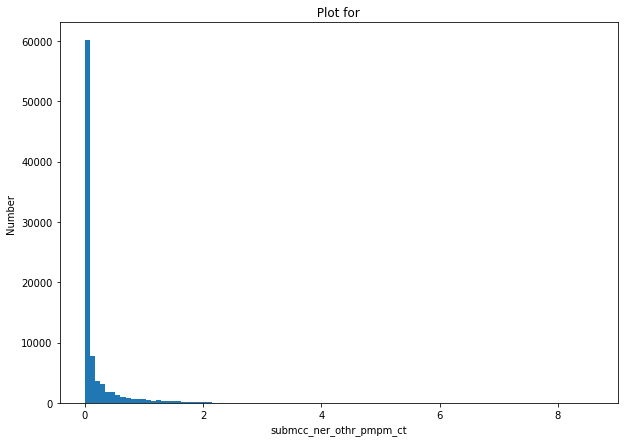

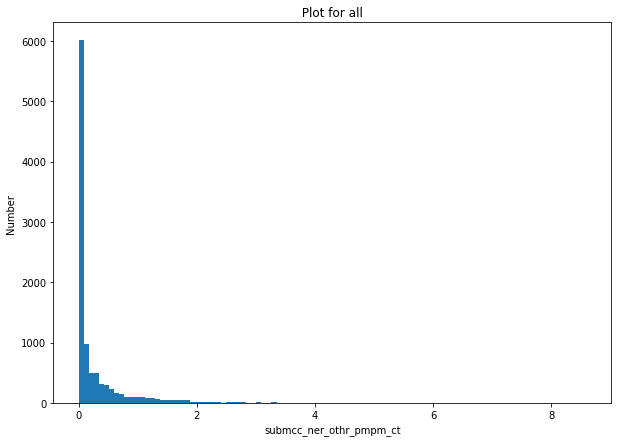

In [ ]:
import matplotlib.pyplot as plt

#features_num_vis_imp = ['betos_o1a_pmpm_ct']

features_num_vis_imp = ['submcc_ner_othr_pmpm_ct']

for col in features_num_vis_imp:
    numerical_distribution(df_new, col)
    numerical_distribution(transport_issues, col)

# Plot histograms for all numerical features
for col in features_num_vis_imp:
    fig, ax = plt.subplots(figsize =(10, 7)) 
    plt.hist(df_new[col], bins = 100)
    plt.title(" Plot for ")
    plt.xlabel(col)
    plt.ylabel("Number ")
    plt.show()
    fig, ax = plt.subplots(figsize =(10, 7)) 
    plt.hist(transport_issues[col], bins = 100)
    plt.title(" Plot for all ")
    plt.xlabel(col)
    plt.ylabel("Number ")
    plt.show()


In [ ]:
df_new['cms_tot_partd_payment_amtBinnedCut'].dtype

CategoricalDtype(categories=[(-0.858, 85.791], (85.791, 171.582], (171.582, 257.373], (257.373, 343.164], (343.164, 428.955], (428.955, 514.746], (514.746, 600.537], (600.537, 686.328], (686.328, 772.119], (772.119, 857.91]],
              ordered=True)

In [ ]:
train_df = df_new[df_new['transportation_issues'].notna()]
train_df = train_df.drop(['transportation_issues'], axis = 1)

In [ ]:
train_df.shape

(69572, 859)

In [ ]:
test_df = df_new[df_new['transportation_issues'].isna()]
test_df = test_df.drop(['transportation_issues'], axis = 1).values
test_df.shape

(17681, 859)

In [ ]:
y = df_new['transportation_issues'][df_new['transportation_issues'].notna()]
y.shape

(69572,)

In [ ]:
X = train_df.iloc[:,:].values
y = y.values

In [ ]:
counter = Counter(y)

In [ ]:
counter

Counter({0.0: 59375, 1.0: 10197})

Counter({0.0: 59375, 1.0: 10197})


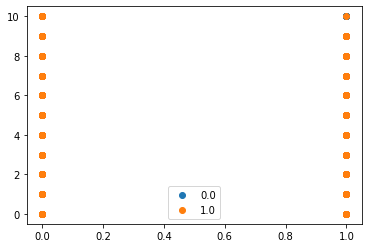

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
# define dataset
# summarize class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

NameError: ignored

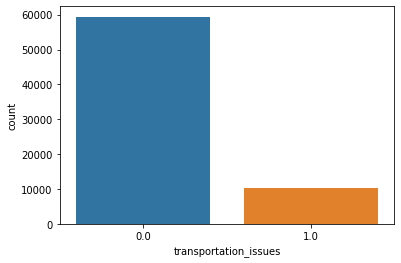

In [ ]:
import matplotlib.pyplot as plt


ax = sns.countplot(x='transportation_issues',  data=df_new)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
plt.show()

In [ ]:
print(type(train_df))
print(type(test_df))
print(type(X))


<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# Smote

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
X_resampled, y_resampled = smote.fit_resample(X, y)

"""print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))"""

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


"print('Original dataset shape', Counter(y))\nprint('Resample dataset shape', Counter(y_ros))"

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state = 0)

# End of smote

In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)



In [ ]:
# train-test not full Train
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#print(X_train)
#print(X_test)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X)
X_test = sc.transform(test_df)
#print(X_train)
#print(X_test

In [ ]:
test_df = sc.transform(test_df)

In [ ]:
# SMOTE
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_resampled)
X_test = sc.transform(test_df)
#print(X_train)
#print(X_test)


In [ ]:
# USING full TRain
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X)
X_test = sc.transform(test_df)
#print(X_train)
#print(X_test)


Random Forest 

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
random_forest_classifier = RandomForestClassifier(n_estimators = 100, random_state = 0, criterion = 'entropy', class_weight="balanced")
tree_class = random_forest_classifier.fit(X_train, y_train)

In [ ]:

y_pred = random_forest_classifier.predict(X_test)
predictions = tree_class.predict_proba(X_test)
print(y_pred)
print(y_test)


[0. 0. 0. ... 0. 0. 0.]
[0. 0. 1. ... 0. 0. 0.]


0.7206027526776736


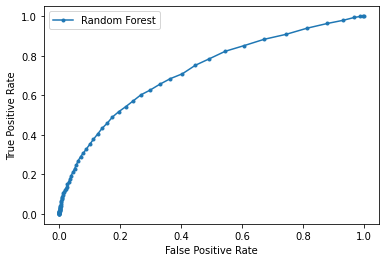

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot
%matplotlib inline
print(roc_auc_score(y_test, predictions[:,1]))

fpr, tpr, _ = roc_curve(y_test, predictions[:,1])




#pyplot.plot(fpr, tpr, linestyle='--', label='Random Forest')
pyplot.plot(fpr, tpr, marker='.', label='Random Forest')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
from sklearn.metrics import log_loss

probs = predictions[:, 1]
# calculate log loss
loss_xg = log_loss(y_test, probs)
loss_xg

0.3790863283715298

Smote

0.9601174709685384


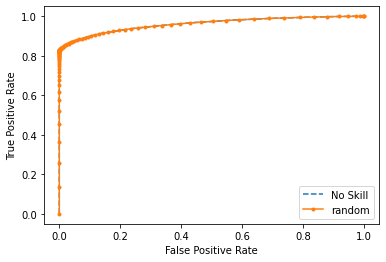

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot
%matplotlib inline
print(roc_auc_score(y_test, predictions[:,1]))

fpr, tpr, _ = roc_curve(y_test, predictions[:,1])




pyplot.plot(fpr, tpr, linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='random')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

[[11789    48]
 [ 1991    87]]


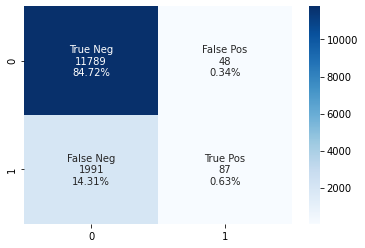

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

import seaborn as sns
"""sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues', cbar=False)
"""
print(cm)
accuracy_score(y_test, y_pred)
# greatest with 100 estimators and no scaling 
# in case of weighted, both are almost same
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

Smote

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
# greatest with 100 estimators and no scaling 
# in case of weighted, both are almost same

[[11738    88]
 [ 1902 10022]]


0.9162105263157895

XGBoost

In [ ]:
from xgboost import XGBClassifier
xgboost_classifier = XGBClassifier(class_weight="balanced")
xgboost_tree = xgboost_classifier.fit(X_train, y_train)

In [ ]:

y_pred_xg = xgboost_classifier.predict(X_test)
predictions_xg = xgboost_tree.predict_proba(X_test)
print(y_pred_xg)
print(predictions_xg)

[0. 0. 0. ... 0. 0. 0.]
[[0.93773115 0.06226886]
 [0.8054114  0.19458859]
 [0.7003112  0.29968882]
 ...
 [0.7943391  0.20566086]
 [0.90632343 0.09367654]
 [0.90393454 0.09606544]]


In [ ]:
from sklearn.metrics import log_loss

probs = predictions_xg[:, 1]
# calculate log loss
loss_xg = log_loss(y_test, probs)
loss_xg

0.36940117439524844

SMote

In [ ]:
from sklearn.metrics import log_loss

probs = predictions_xg[:, 1]
# calculate log loss
loss_xg = log_loss(y_test, probs)
loss_xg

0.221143713769396

[[11726   111]
 [ 1891   187]]


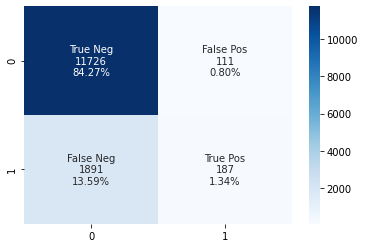

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_xg)
print(cm)
accuracy_score(y_test, y_pred_xg)
# greatest with 100 estimators and no scaling 
# in case of weighted, both are almost same
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

Smote

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
# greatest with 100 estimators and no scaling 
# in case of weighted, both are almost same

[[11738    88]
 [ 1902 10022]]


0.9162105263157895

0.7418139342690084


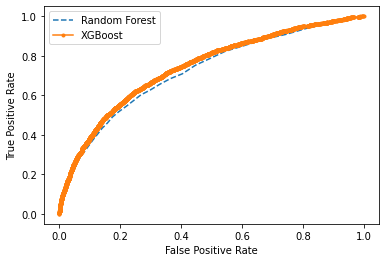

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot


print(roc_auc_score(y_test, predictions_xg[:,1]))

fpr_xg, tpr_xg, _ = roc_curve(y_test, predictions_xg[:,1])




pyplot.plot(fpr, tpr, linestyle='--', label='Random Forest')
pyplot.plot(fpr_xg, tpr_xg, marker='.', label='XGBoost')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

SMOTE

0.9563246564733532


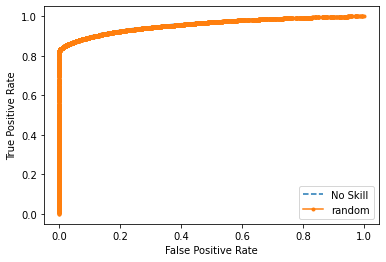

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot


print(roc_auc_score(y_test, predictions_xg[:,1]))

fpr_xg, tpr_xg, _ = roc_curve(y_test, predictions_xg[:,1])




pyplot.plot(fpr, tpr, linestyle='--', label='No Skill')
pyplot.plot(fpr_xg, tpr_xg, marker='.', label='random')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

LGBM

In [ ]:
import lightgbm as lgb

In [ ]:
# SMOTE
d_train=lgb.Dataset(X_train, label=y_resampled)
params={}
params['learning_rate']=0.03
params['is_unbalance'] = False
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='binary' #Binary target feature
params['metric']='binary_logloss' #metric for binary classification
params['max_depth']=-1
clf_lgb=lgb.train(params,d_train,100) #train the model on 100 epocs
y_pred_lgb=clf_lgb.predict(X_test)

In [ ]:
# without Full  train
d_train=lgb.Dataset(X_train, label=y_train)
params={}
params['learning_rate']=0.02
params['is_unbalance'] = False
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='binary' #Binary target feature
params['metric']='binary_logloss' #metric for binary classification
params['max_depth']=-1
clf_lgb=lgb.train(params,d_train,200) #train the model on 100 epocs
y_pred_lgb=clf_lgb.predict(X_test)

In [ ]:
# Full train
d_train=lgb.Dataset(X_train, label=y)
params={}
params['learning_rate']=0.03
params['is_unbalance'] = False
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='binary' #Binary target feature
params['metric']='binary_logloss' #metric for binary classification
params['max_depth']=-1
clf_lgb=lgb.train(params,d_train,100) #train the model on 100 epocs
y_pred_lgb=clf_lgb.predict(X_test)

In [ ]:
d_train=lgb.Dataset(X_train, label=y_train)
params={}
params['learning_rate']=0.02
params['num_leaves']: 1000
params['is_unbalance'] = False
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='binary' #Binary target feature
params['metric']='binary_logloss' #metric for binary classification
params['max_depth']=30
params['min_child_samples']: 78
params['lambda_l1']: 4.5710796637344755
params['lambda_l2']: 2.9721923015218796 
params['num_leaves']: 31
params['feature_fraction']: 0.7822395507451473 
params['bagging_fraction']: 0.5614815105648284 
params['bagging_freq']: 6
clf_lgb=lgb.train(params,d_train,200) #train the model on 100 epocs
y_pred_lgb=clf_lgb.predict(X_test)

In [ ]:
d_train=lgb.Dataset(X_train, label=y)
params={}
params['learning_rate']=0.02
params['num_leaves']: 1000
params['is_unbalance'] = False
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='binary' #Binary target feature
params['metric']='binary_logloss' #metric for binary classification
params['max_depth']=30
params['min_child_samples']: 78
params['lambda_l1']: 4.5710796637344755
params['lambda_l2']: 2.9721923015218796 
params['num_leaves']: 31
params['feature_fraction']: 0.7822395507451473 
params['bagging_fraction']: 0.5614815105648284 
params['bagging_freq']: 6
clf_lgb=lgb.train(params,d_train,200) #train the model on 100 epocs
y_pred_lgb=clf_lgb.predict(X_test)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

rfc_cv_score = cross_val_score(clf_lgb, X_train, y_train, cv=5, scoring='roc_auc')
rfc_cv_score

In [ ]:
X_test

array([[-6.69102029e-01,  3.29417470e+00,  2.97180693e+00, ...,
         1.00960819e+00,  1.81991238e+00,  1.02100838e+00],
       [-6.69102029e-01,  1.17044011e-01, -1.47281237e-01, ...,
         2.17333828e-01, -4.85532453e-01,  1.41573443e-01],
       [-6.69102029e-01, -9.41999551e-01,  2.98302787e-01, ...,
        -6.87900696e-04, -3.92991622e-01, -1.21533157e-03],
       ...,
       [-6.69102029e-01, -9.41999551e-01, -1.48403331e+00, ...,
         2.65181858e-01, -1.75796202e-01,  2.48788504e-01],
       [ 1.49454038e+00,  6.46565792e-01,  2.98302787e-01, ...,
        -8.68705181e-01, -5.33893113e-01, -8.49572120e-01],
       [-6.69102029e-01,  6.46565792e-01,  2.98302787e-01, ...,
         1.31227479e+00,  9.49420495e-01,  9.33132740e-01]])

In [ ]:
test_df

In [ ]:
# for final TEST
y_pred_lgb=clf_lgb.predict(X_test)
y_pred_lgb=y_pred_lgb.round(0)
y_pred_lgb=y_pred_lgb.astype(int)
np.unique(y_pred_lgb, return_counts=True)

(array([0, 1]), array([17346,   335]))

In [ ]:
y_pred_lgb

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
ans_df = pd.DataFrame(y_pred_lgb, columns=['transportation_issues']) 
ans_df

In [ ]:
ans_df['transportation_issues'].value_counts()

0    17346
1      335
Name: transportation_issues, dtype: int64

In [ ]:
ans_df['SCORE'] = clf_lgb.predict(X_test)

In [ ]:
ans_df.head()

,transportation_issues,SCORE,ID,RANK
0,0,0.476716,000M289dOSbe8dTL75c71YAI,409
1,0,0.077385,000b16MOSTLY7A637698c5I3,11430
2,0,0.139203,0011MOdcfS9188T8aLYA3dIa,6492
3,0,0.064308,001MO8SaT6dL8ae755cYA3dI,13681
4,0,0.308999,001MOS3a40Tc5L1534YAeI40,1709


In [ ]:
ans_df['ID'] = df_holdout['person_id_syn']

In [ ]:
len(ans_df['SCORE'].unique())

17681

In [ ]:
len(ans_df['SCORE'])

17681

In [ ]:
ans_df['RANK'] = ans_df['SCORE'].rank(method='max', ascending = False).astype(int)

In [ ]:
ans_df.to_csv('Final_Submission.csv', index = False)

In [ ]:
ans_df[['ID', 'SCORE', 'RANK']]

In [ ]:
from google.colab import files
ans_df[['ID', 'SCORE', 'RANK']].to_csv('Final_Submission.csv', index = False) 
files.download('Final_Submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
ans_df = ans_df.sort_values(by=['RANK'])

In [ ]:
from google.colab import files
ans_df[['ID', 'SCORE', 'RANK']].to_csv('Final_Submission.csv', index = False) 
files.download('Final_Submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# for Test in Train-test split
y_pred_lgb=clf_lgb.predict(X_test)
y_pred_lgb=y_pred_lgb.round(0)
y_pred_lgb=y_pred_lgb.astype(int)
np.unique(y_pred_lgb, return_counts=True)

(array([0, 1]), array([17346,   335]))

Smote

In [ ]:
# for Test in Train-test split
y_pred_lgb=clf_lgb.predict(X_test)
y_pred_lgb=y_pred_lgb.round(0)
y_pred_lgb=y_pred_lgb.astype(int)
np.unique(y_pred_lgb, return_counts=True)

(array([0, 1]), array([13654,   261]))

In [ ]:
y_pred_lgb=clf_lgb.predict(X_test)
y_pred_lgb

array([0.05604646, 0.1780508 , 0.30256349, ..., 0.17388714, 0.08648769,
       0.09812438])

0.7403972942380717


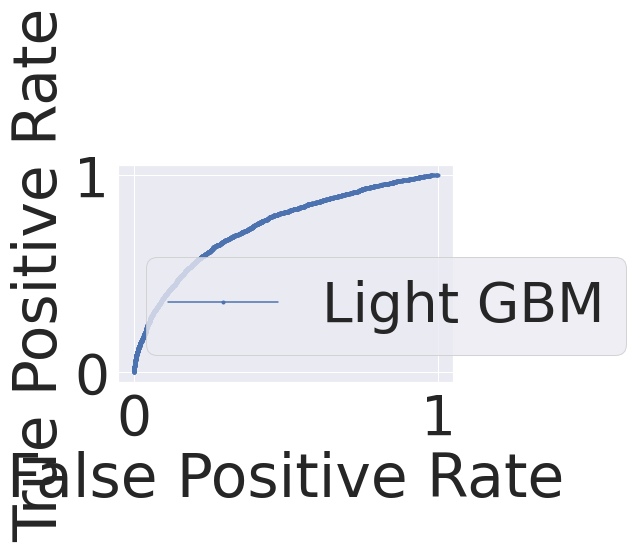

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot


print(roc_auc_score(y_test, y_pred_lgb))

fpr_lgb, tpr_lgb, _ = roc_curve(y_test, y_pred_lgb)





#pyplot.plot(fpr, tpr, linestyle='--', label='XGBoost')
pyplot.plot(fpr_lgb, tpr_lgb,  marker='.', label='Light GBM')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
from sklearn.metrics import log_loss

# calculate log loss
loss_lgb = log_loss(y_test, y_pred_lgb)
loss_lgb

0.5694537892655868

[[11742    95]
 [ 1912   166]]
0.8557671577434424
166 95 1912 11742


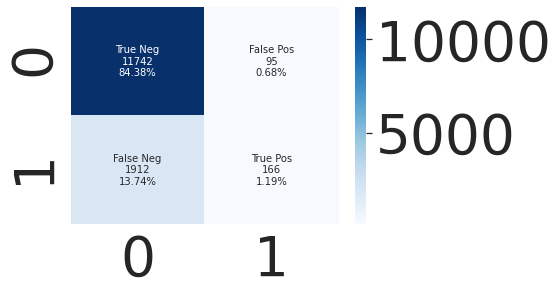

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
%matplotlib inline
cm = confusion_matrix(y_test, y_pred_lgb.round(0))
print(cm)
print(accuracy_score(y_test, y_pred_lgb.round(0)))
tn, fp, fn, tp = cm.ravel()
# greatest with 100 estimators and
print(tp,fp,fn,tn)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

SMote

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_lgb.round(0))
print(cm)
print(accuracy_score(y_test, y_pred_lgb.round(0)))
tn, fp, fn, tp = cm.ravel()
# greatest with 100 estimators and
print(tp,fp,fn,tn)

[[11736   101]
 [ 1906   172]]
0.8557671577434424
172 101 1906 11736


In [ ]:

from sklearn.metrics import roc_curve, roc_auc_score
roc_auc_score(y_test,y_pred_lgb)

0.7403972942380717

SMOTE

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
roc_auc_score(y_test,y_pred_lgb)

0.955748114800921

In [ ]:
y_test

array([0., 0., 1., ..., 0., 0., 0.])

In [ ]:
y_pred_lgb

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_lgb))

In [ ]:
!pip install shap

In [ ]:
import shap

In [ ]:
categorical_features_indices = []
for col in df_new.columns:
  if col in df_cat.columns:
    if df_new[col].dtype != np.float64:
      categorical_features_indices.append(df_new.columns.get_loc(col))

In [ ]:
def get_xgb_imp(xgb, feat_names):
    from numpy import array
    imp_vals = xgb.booster().get_fscore()
    imp_dict = {feat_names[i]:float(imp_vals.get('f'+str(i),0.)) for i in range(len(feat_names))}
    total = array(imp_dict.values()).sum()
    return {k:v/total for k,v in imp_dict.items()}

In [ ]:
df_new_filtered = df_new[['age_bins',	'cms_tot_partd_payment_amt',	'ccsp_239_ind',	'cms_disabled_ind',	'betos_o1a_pmpm_ct',	'cms_rx_risk_score_nbr',	'cms_low_income_ind',	'cms_risk_adj_payment_rate_a_amt',	'med_ambulance_visit_ct_pmpm',	'betos_m1b_pmpm_ct',	'cms_partd_ra_factor_amt',	'med_er_visit_ct_pmpm',	'rx_bh_pmpm_ct',	'betos_t1a_pmpm_ct',	'total_ambulance_visit_ct_pmpm',	'betos_y2_pmpm_ct',	'cons_homstat_Y',	'rx_mail_pmpm_ct',	'betos_m5b_pmpm_ct',	'cmsd2_men_men_substance_ind',	'credit_hh_totalallcredit_severederog',	'submcc_vco_exam_pmpm_ct',	'betos_m5d_pmpm_ct',	'cmsd2_men_mad_ind',	'submcc_sns_othr_pmpm_ct',	'cons_n2pmv',	'total_er_visit_ct_pmpm',	'credit_hh_bankcard_severederog',	'cons_n65p_y_1.0',	'credit_prcnt_mtgcredit',	'cons_hhcomp_B',	'credit_bal_agencyfirstmtg_new',	'med_outpatient_visit_ct_pmpm',	'rx_gpi2_72_pmpm_ct',	'submcc_ner_othr_pmpm_ct',	'submcc_rsk_chol_pmpm_ct',	'total_outpatient_visit_ct_pmpm',	'cms_risk_adjustment_factor_a_amt',	'mabh_seg_H2',	'credit_bal_totalallcredit_60dpd',	'bh_cdto_ind',	'cms_ra_factor_type_cd_CN',	'credit_hh_1stmtgcredit_new',	'credit_hh_nonmtgcredit_60dpd',	'credit_hh_studentloan_60dpd',	'ccsp_220_ind',	'cmsd2_skn_radiation_ind',	'credit_bal_1stmtg_severederog',	'credit_bal_mtg_severederog',	'submcc_men_alco_pmpm_ct']].copy()

In [ ]:
df_new_filtered.corr()

In [ ]:

get_xgb_imp(xgb,feat_names)

In [ ]:
import numpy as np
from xgboost import XGBClassifier

>>> feat_names = ['var1','var2','var3','var4','var5']
>>> np.random.seed(1)
>>> X = np.random.rand(100,5)
>>> y = np.random.rand(100).round()
>>> xgb = XGBClassifier(n_estimators=10)
>>> xgb = xgb.fit(X,y)
>>> 
>>> get_xgb_imp(xgb,feat_names)

In [ ]:
shap_values = clf_lgb.get_feature_importance(
    Pool(X_test, label=y_test, cat_features=categorical_features_indices),
    type="ShapValues",
)
shap_values = shap_values[:, :-1]
 
 
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [ ]:
df_new_selected.columns

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def plotImp(model, X , num = 20):
    feature_imp = pd.DataFrame({'Value':model.feature_importance(),'Feature':X.columns})
    plt.figure(figsize=(40, 20))
    sns.set(font_scale = 5)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", 
                                                        ascending=False)[0:num])
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()
    plt.savefig('lgbm_importances-01.png')
    plt.show()

In [ ]:
%matplotlib inline
plotImp(clf_lgb,df_new_selected)

In [ ]:
clf_lgb.plot_importance()

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
feature_imp = pd.DataFrame(sorted(zip(clf_lgb.feature_importance(),df_new.columns)), columns=['Value','Feature'])
"""plt.figure(figsize=(20, 150))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()"""
print(feature_imp)


     Value                                Feature
0        0                          betos_d1c_ind
1        0                          betos_d1d_ind
2        0                          betos_m2c_ind
3        0                      betos_m2c_pmpm_ct
4        0                          betos_o1a_ind
5        0                          betos_o1b_ind
6        0                      betos_o1b_pmpm_ct
7        0                          betos_t1b_ind
8        0                          betos_t2a_ind
9        0                            bh_aoth_ind
10       0                            bh_cdsb_ind
11       0                           ccsp_014_ind
12       0                           ccsp_020_ind
13       0                           ccsp_021_ind
14       0                           ccsp_034_ind
15       0                           ccsp_060_ind
16       0                           ccsp_062_ind
17       0                           ccsp_080_ind
18       0                           ccsp_120_ind


In [ ]:
# 5-74, 7-757, 9-758, 10-75333, 12-75120, 14- 7493, 15-7598, 16-75929, 17-7558, 20-754, 25-7451, 37-74,

In [ ]:
# try 1 
features_to_select = feature_imp[feature_imp['Value']>34]
features_to_select_list = features_to_select['Feature'].tolist()
features_to_select.shape

(144, 2)

In [ ]:
feature_imp = feature_imp[feature_imp['Value']>34]
plt.figure(figsize=(40, 40))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
sns.set(font_scale = 5)
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()
plt.tight_layout()
#print(feature_imp)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def plotImp(model, X , num = 50):
    feature_imp = pd.DataFrame({'Value':clf_lgb.feature_importance(),'Feature':df_new.columns})
    plt.figure(figsize=(40, 20))
    sns.set(font_scale = 5)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", 
                                                        ascending=False)[0:num])
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()
    plt.savefig('lgbm_importances-01.png')
    plt.show()
%matplotlib inline
plotImp(clf_lgb,df_new_selected)

ValueError: ignored

In [ ]:
for i in range(len(feature_imp)):
  features_to_select = feature_imp[feature_imp['Value']>i]
  features_to_select_list = features_to_select['Feature'].tolist()
  print(i)
  print(features_to_select.shape[0])

In [ ]:
df_new_selected = df_new[features_to_select_list]

In [ ]:
df_new_selected.shape

(87253, 144)

In [ ]:
df_new = pd.concat([df_new_selected,df['transportation_issues']],axis = 1)


In [ ]:
train_df = df_new[df_new['transportation_issues'].notna()]
train_df = train_df.drop(['transportation_issues'], axis = 1)

In [ ]:
test_df = df_new[df_new['transportation_issues'].isna()]
test_df = test_df.drop(['transportation_issues'], axis = 1).values
test_df.shape

(17681, 144)

In [ ]:
y = df_new['transportation_issues'][df_new['transportation_issues'].notna()]
y.shape

(69572,)

In [ ]:
X = train_df.iloc[:,:].values
y = y.values

In [ ]:
# If smote is used for new feature generation
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
X_resampled, y_resampled = smote.fit_resample(X, y)

"""print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))"""

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


"print('Original dataset shape', Counter(y))\nprint('Resample dataset shape', Counter(y_ros))"

In [ ]:
# If smote is used for new feature generation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state = 0)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#print(X_train)
#print(X_test)
